In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import seaborn as sns

In [13]:
names=['User ID','Name of the steam game','purchase/play','hours/purchase']
df = pd.read_csv('steam-200k.csv',names=names,index_col=False)

In [14]:
df.head()

,User ID,Name of the steam game,purchase/play,hours/purchase
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0
1,151603712,The Elder Scrolls V Skyrim,play,273.0
2,151603712,Fallout 4,purchase,1.0
3,151603712,Fallout 4,play,87.0
4,151603712,Spore,purchase,1.0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 4 columns):
User ID                   200000 non-null int64
Name of the steam game    200000 non-null object
purchase/play             200000 non-null object
hours/purchase            200000 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.1+ MB


In [17]:
num_users = df['User ID'].nunique()

12393

In [37]:
playing = df[df['purchase/play']=='play']

In [38]:
purchased = df[df['purchase/play']=='purchase']

In [40]:
purchased_popularity = purchased.groupby('Name of the steam game').nunique()

C:\Users\Nosuke\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


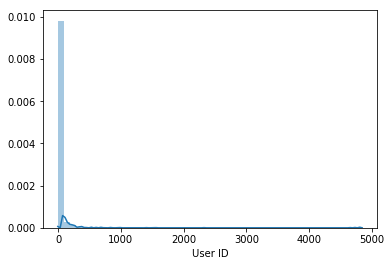

In [49]:
sns.distplot(purchased_popularity['User ID'])

In [124]:
purchased_popularity.sort_values('User ID',ascending=False).head()

,User ID,Name of the steam game,purchase/play,hours/purchase
Name of the steam game,,,,
Dota 2,4841,1,1,1
Team Fortress 2,2323,1,1,1
Unturned,1563,1,1,1
Counter-Strike Global Offensive,1412,1,1,1
Half-Life 2 Lost Coast,981,1,1,1


In [72]:
playing_hours = playing.groupby('Name of the steam game').sum()

In [74]:
playing_nums = playing.groupby('Name of the steam game').nunique('User ID')

In [117]:
playing_hours = playing_hours[['hours/purchase']]
playing_nums = playing_nums[['User ID']]

In [118]:
pp=pd.concat([playing_hours,playing_nums], axis=1)

In [125]:
pp.sort_values('hours/purchase',ascending=False).head(5)

,hours/purchase,User ID,average
Name of the steam game,,,
Dota 2,981684.6,4841,202.785499
Counter-Strike Global Offensive,322771.6,1377,234.402033
Team Fortress 2,173673.3,2323,74.762505
Counter-Strike,134261.1,568,236.375176
Sid Meier's Civilization V,99821.3,554,180.182852


In [126]:
pp.sort_values('User ID',ascending=False).head(5)

,hours/purchase,User ID,average
Name of the steam game,,,
Dota 2,981684.6,4841,202.785499
Team Fortress 2,173673.3,2323,74.762505
Counter-Strike Global Offensive,322771.6,1377,234.402033
Unturned,16096.4,1069,15.057437
Left 4 Dead 2,33596.7,801,41.943446


In [121]:
pp['average'] = pp['hours/purchase'] / pp['User ID']

In [127]:
pp.sort_values('average',ascending=False).head(5)

,hours/purchase,User ID,average
Name of the steam game,,,
Eastside Hockey Manager,1295.0,1,1295.000000
Baldur's Gate II Enhanced Edition,4277.3,9,475.255556
FIFA Manager 09,411.0,1,411.000000
Perpetuum,1603.9,4,400.975000
Football Manager 2014,30574.8,78,391.984615


In [128]:
pp[pp['User ID']>100].sort_values('average',ascending=False).head(5)

,hours/purchase,User ID,average
Name of the steam game,,,
Football Manager 2013,32308.6,104,310.659615
Counter-Strike,134261.1,568,236.375176
Counter-Strike Global Offensive,322771.6,1377,234.402033
Dota 2,981684.6,4841,202.785499
Mount & Blade Warband,20636.8,113,182.626549


In [129]:
df['User ID'].nunique()

hours/purchase    3.445366e+06
User ID           7.047700e+04
average           4.800270e+04
dtype: float64

In [133]:
pp['pop_den'] = pp['User ID'] / 12393 

12393

In [135]:
pp.sort_values('pop_den',ascending=False).head(5)

,hours/purchase,User ID,average,pop_den
Name of the steam game,,,,
Dota 2,981684.6,4841,202.785499,0.390624
Team Fortress 2,173673.3,2323,74.762505,0.187445
Counter-Strike Global Offensive,322771.6,1377,234.402033,0.111111
Unturned,16096.4,1069,15.057437,0.086258
Left 4 Dead 2,33596.7,801,41.943446,0.064633


In [136]:
user_act = purchased.groupby('User ID').nunique()

In [143]:
rank = user_act.sort_values('Name of the steam game',ascending=False)

C:\Users\Nosuke\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


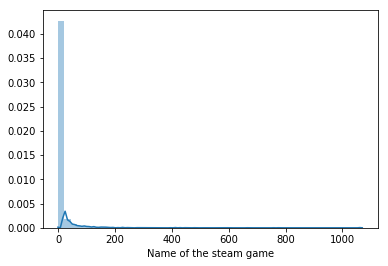

In [144]:
sns.distplot(rank['Name of the steam game'])